In [90]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image

In [91]:
img = cv2.imread('Data/CHP/1/img012.bmp', cv2.IMREAD_COLOR)

In [92]:
#dst = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
dst = cv2.medianBlur(img, 3) #mediana
#dst = cv2.GaussianBlur(img,(3,3),cv2.BORDER_DEFAULT) #gaussiano

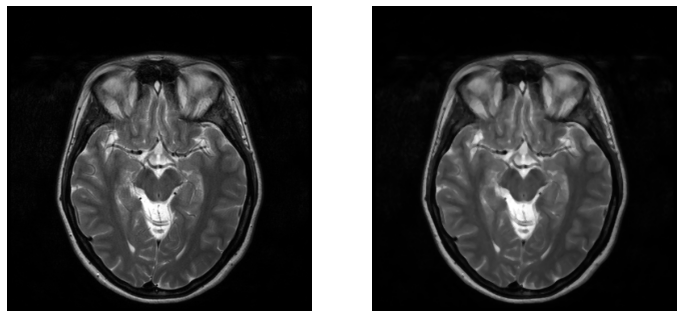

In [93]:
fig1=plt.figure(figsize = (12,12))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig1.add_subplot(1, 2, 2)
plt.imshow(dst, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

/tmp/ipykernel_8014/739166782.py:3: RuntimeWarning: divide by zero encountered in log
  Iout=np.log(dst[:,:]+1)


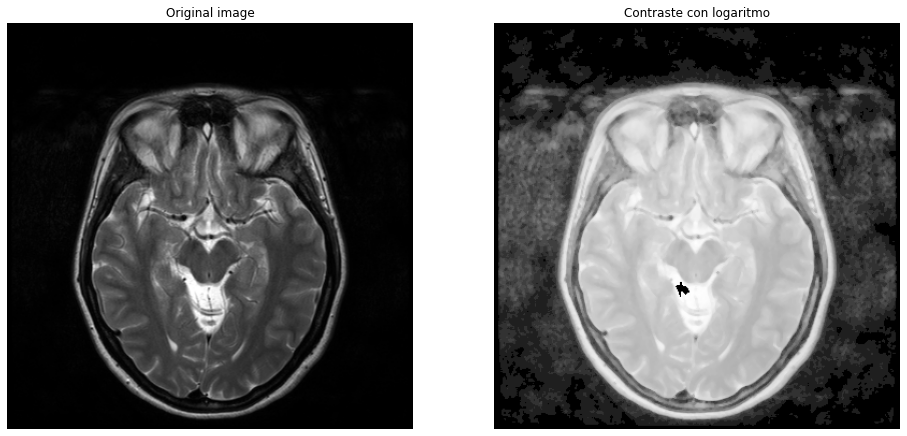

In [94]:
inmax=np.amax(dst)
c=255/(np.log(1+inmax))
Iout=np.log(dst[:,:]+1)
Iout=c*Iout[:,:]
Iout=Iout.astype(np.uint8)
dst=dst.astype(np.uint8)

fig1=plt.figure(figsize = (16,16))
a = fig1.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');
a.set_title('Original image');

b = fig1.add_subplot(1,2,2)
plt.imshow(Iout, cmap = 'gray', vmin=0, vmax=255)
plt.axis('off')
b.set_title('Contraste con logaritmo');

min= 0 max= 254


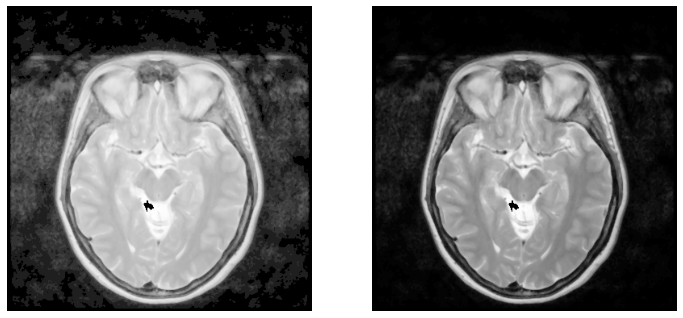

In [95]:
##CONTRASTRE CON CORRECCIÓN GAMMA
x=np.linspace(0, 255, num=256)
vg=np.array([0.05, 0.1,0.2, 0.5, 1, 2, 5, 10]) 
for i in vg:
    c=255/(255**i)
    gamma=c*(x**i)

maxi = np.amax(Iout)
vg=1.9  #Change the gamma value
c=255/(maxi**vg)
I2=c*np.float32(Iout)**vg
I2=I2.astype(np.uint8)
inmax = np.amax(I2)
inmin = np.amin(I2)
print('min=',inmin,'max=',inmax)

fig5=plt.figure(figsize = (12,12))
a = fig5.add_subplot(1, 2, 1)
plt.imshow(Iout, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig5.add_subplot(1, 2, 2)
plt.imshow(I2, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

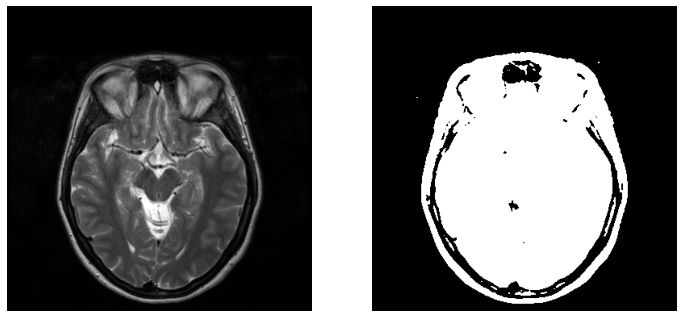

In [96]:
def binariza(image,Cerebro=True):
    if Cerebro:
        t = threshold_otsu(image)
    else:#Crânio
        t = 0
    imagem_binaria = image.copy()
    imagem_binaria[imagem_binaria<=t] = 0
    imagem_binaria[imagem_binaria>t] = 255
    return imagem_binaria

Gbin = binariza(cv2.cvtColor(I2,cv2.COLOR_BGR2GRAY))


fig6=plt.figure(figsize = (12,12))
a = fig6.add_subplot(1, 2, 1)
plt.imshow(img, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');

b = fig6.add_subplot(1, 2, 2)
plt.imshow(Gbin, cmap='gray',vmin=0,vmax=2**8)
plt.axis('off');



#plt.imshow(Gbin,'gray')

19


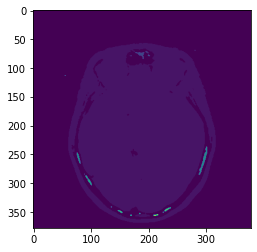

In [97]:
from scipy import ndimage
label_im, nb_labels = ndimage.label(Gbin)
print(nb_labels) # how many regions?

plt.imshow(label_im)    

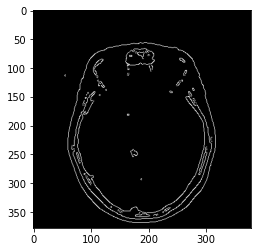

In [98]:
canny = cv2.Canny(Gbin, 0, 255)
plt.imshow(canny, cmap='gray')